In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import math
import matplotlib
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
#important for text to be detected when importing saved figures into illustrator
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

In [ ]:
rootpath = r"...\Data\Figure 1 and S1,S2"
figurepath = os.path.join(rootpath,"figure")
metapath = os.path.join(rootpath,"meta")
datapath = os.path.join(rootpath,"data")
positionpath = os.path.join(rootpath,"position")
moviepath = os.path.join(rootpath,"movie")
statspath = os.path.join(rootpath,"stats")
trackingdatapath = os.path.join(rootpath,"Interaction_zone_tracking") # contains data from DLC tracking.
for x in [figurepath,datapath,statspath]:
    if not os.path.exists(x):
        os.mkdir(x)

In [3]:
# Load the meta data
female_self_pacaed_sexual_behavior_meta = pd.read_csv(os.path.join(metapath,'Figure1_Hormone_meta.csv'),index_col = False)
# read the meta file
Estrus_behavior_meta = pd.read_csv(os.path.join(metapath,'Figure1_Estrus_meta.csv'),index_col = False)


In [4]:
# Basical variables
post_Ejaculation_window = int(10*60)

In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
#manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

# Figure 1B

In [5]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"),index_col = None)

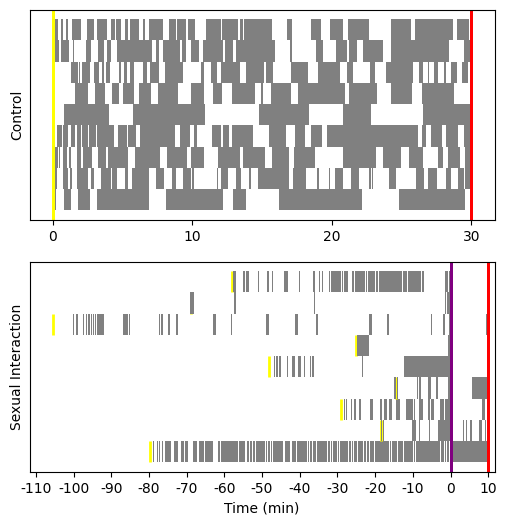

In [6]:
# Create a list of the IDs of the groups. Sort them based on the Time_in_Isolation_zone_per_10min column.
IDs = group_df[(group_df.State == 'Post_Ejaculation')].sort_values(by = 'Time_in_Isolation_zone_per_10min',ascending = True).ID

# plot figures
fig,ax = plt.subplots(2,1,figsize = (6,6))
for video_name in female_self_pacaed_sexual_behavior_meta.video_name:
    temppath = [os.path.join(trackingdatapath,f) for f in os.listdir(trackingdatapath) if video_name in f][0]
    tempdf = pd.read_csv(temppath,index_col = False)
    filename,ID,Experiment_type,Ejaculation_frame,Framerate,Onset_frame,Offset_frame = \
    female_self_pacaed_sexual_behavior_meta.loc[female_self_pacaed_sexual_behavior_meta.video_name == video_name,['filename','ID','Experiment_type','Ejaculation_frame',\
                                                          'Framerate','Onset_frame','Offset_frame']].values[0]
    # align to the Ejaculation
    if Experiment_type == 'SI':
        Offset_frame = Ejaculation_frame + post_Ejaculation_window*Framerate
        alignment_frame = Ejaculation_frame
    else:
        alignment_frame = Onset_frame
    
    # Convert frames to seconds
    Entry_frame = tempdf[tempdf.Animal_name =='B6']['Entry_frame'].values/Framerate
    Exit_frame = tempdf[tempdf.Animal_name =='B6']['Exit_frame'].values/Framerate
    
    # Get which row 
    idx = np.where(IDs == ID)[0][0]

    # Plot start,stop and Ejaculation frames in the video
    if Experiment_type == 'SI':
        axs = ax[1]
        axs.axvline(x = (Ejaculation_frame- alignment_frame)/Framerate,color = 'purple',lw = 2)
        axs.axvline(x = post_Ejaculation_window,color = 'red',lw = 2)
        axs.fill_betweenx(  [idx,idx+1],x1 = (Onset_frame - alignment_frame)/Framerate,
                            x2 = (Onset_frame - alignment_frame)/Framerate +1 ,color = 'yellow',lw = 2)
    else:
        axs = ax[0]
        axs.axvline(x = 1800,color = 'red',lw = 2)
        axs.axvline(x = 0,color = 'yellow',lw = 2)

    [axs.fill_betweenx([idx,idx +1],\
                      x1 = Entry_frame[iidx],\
                      x2 = Exit_frame[iidx],alpha = 1,color = 'gray',lw = 0) \
     for iidx in range(len(Entry_frame))]
ax[0].set_xlim(-100,1900)
ax[1].set_xlim(-6700,700)
ax[0].set_ylabel('Control')
ax[1].set_ylabel('Sexual Interaction')
[axs.set_yticks([]) for axs in ax]
ax[0].set_xlabel('')
ax[1].set_xlabel('Time (min)')

ax[0].set_xticks(np.linspace(0,1800,1800//600 +1))
ax[0].set_xticklabels(np.linspace(0,30,30//10 +1).astype('int'))
ax[1].set_xticks(np.linspace(-6600,600,7200//600 +1))

ax[1].set_xticklabels(np.linspace(-110,10,120//10 +1).astype('int'))

fig.savefig(os.path.join(figurepath,'Figure 1B.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure 1B.pdf'),bbox_inches='tight')        

# Figure 1C

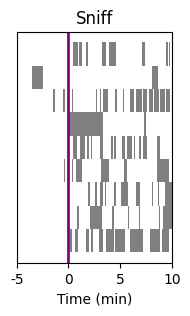

In [7]:
# Create a list of the IDs of the groups. Sort them based on the Time_in_Isolation_zone_per_10min column.
IDs = group_df[(group_df.State == 'Post_Ejaculation')].sort_values(by = 'Time_in_Isolation_zone_per_10min',ascending = True).ID

# plot figures
fig,ax = plt.subplots(1,1,figsize = (2,3))
for video_name in female_self_pacaed_sexual_behavior_meta[female_self_pacaed_sexual_behavior_meta.Experiment_type == 'SI'].video_name:
    temppath = [os.path.join(trackingdatapath,f) for f in os.listdir(trackingdatapath) if video_name in f][0]
    tempdf = pd.read_csv(temppath,index_col = False)
    filename,ID,Experiment_type,Ejaculation_frame,Framerate,Onset_frame,Offset_frame,First_Sniff_onset = \
    female_self_pacaed_sexual_behavior_meta.loc[female_self_pacaed_sexual_behavior_meta.video_name == video_name,['filename','ID','Experiment_type','Ejaculation_frame',\
                                                          'Framerate','Onset_frame','Offset_frame','First_Sniff_onset']].values[0]
    # align to the Ejaculation
    if Experiment_type == 'SI':
        Offset_frame = Ejaculation_frame + post_Ejaculation_window*Framerate
        alignment_frame = First_Sniff_onset
        # Adjust to what you want to align it to
        tempdf.loc[:,['Entry_frame','Exit_frame']] = tempdf.loc[:,['Entry_frame','Exit_frame']] + Ejaculation_frame - (alignment_frame - Onset_frame)
    else:
        continue
    
    # Convert frames to seconds
    Entry_frame = tempdf[tempdf.Animal_name =='B6']['Entry_frame'].values/Framerate
    Exit_frame = tempdf[tempdf.Animal_name =='B6']['Exit_frame'].values/Framerate
    
    # Get which row 
    idx = np.where(IDs == ID)[0][0]

    # Plot start,stop and Ejaculation frames in the video
    if Experiment_type == 'SI':
        axs = ax
        axs.axvline(x = 0,color = 'purple',lw = 1)
    else:
        axs = ax
        axs.axvline(x = 1800,color = 'red',lw = 2)
        axs.axvline(x = 0,color = 'purple',lw = 2)

    [axs.fill_betweenx([idx,idx +1],\
                      x1 = Entry_frame[iidx],\
                      x2 = Exit_frame[iidx],alpha = 1,color = 'gray',lw = 0) \
     for iidx in range(len(Entry_frame))]
axs.set_xlabel('Time (min)')
axs.set_yticks([])
#axs.set_title(filename)
axs.set_title('Sniff')
axs.set_xticks(np.linspace(-300,600,900//300 +1))
axs.set_xlim(-300,600)
axs.set_xticklabels(np.linspace(-5,10,15//5 +1).astype('int'))

fig.savefig(os.path.join(figurepath,'Figure1C.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure1C.pdf'),bbox_inches='tight')        

# Figure 1D

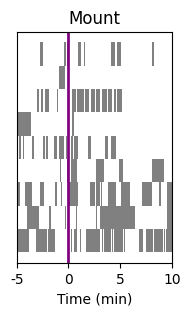

In [8]:
# Create a list of the IDs of the groups. Sort them based on the Time_in_Isolation_zone_per_10min column.
IDs = group_df[(group_df.State == 'Post_Ejaculation')].sort_values(by = 'Time_in_Isolation_zone_per_10min',ascending = True).ID

# plot figures
fig,ax = plt.subplots(1,1,figsize = (2,3))
for video_name in female_self_pacaed_sexual_behavior_meta[female_self_pacaed_sexual_behavior_meta.Experiment_type == 'SI'].video_name:
    temppath = [os.path.join(trackingdatapath,f) for f in os.listdir(trackingdatapath) if video_name in f][0]
    tempdf = pd.read_csv(temppath,index_col = False)
    filename,ID,Experiment_type,Ejaculation_frame,Framerate,Onset_frame,Offset_frame,First_Mount_onset = \
    female_self_pacaed_sexual_behavior_meta.loc[female_self_pacaed_sexual_behavior_meta.video_name == video_name,['filename','ID','Experiment_type','Ejaculation_frame',\
                                                          'Framerate','Onset_frame','Offset_frame','First_Mounting_onset']].values[0]
    # align to the Ejaculation
    if Experiment_type == 'SI':
        Offset_frame = Ejaculation_frame + post_Ejaculation_window*Framerate
        alignment_frame = First_Mount_onset
        # Adjust to what you want to align it to
        tempdf.loc[:,['Entry_frame','Exit_frame']] = tempdf.loc[:,['Entry_frame','Exit_frame']] + Ejaculation_frame - (alignment_frame - Onset_frame)
    else:
        continue
    
    # Convert frames to seconds
    Entry_frame = tempdf[tempdf.Animal_name =='B6']['Entry_frame'].values/Framerate
    Exit_frame = tempdf[tempdf.Animal_name =='B6']['Exit_frame'].values/Framerate
    
    # Get which row 
    idx = np.where(IDs == ID)[0][0]

    # Plot start,stop and Ejaculation frames in the video
    if Experiment_type == 'SI':
        axs = ax
        axs.axvline(x = 0,color = 'purple',lw = 1)
    else:
        axs = ax
        axs.axvline(x = 1800,color = 'red',lw = 2)
        axs.axvline(x = 0,color = 'purple',lw = 2)

    [axs.fill_betweenx([idx,idx +1],\
                      x1 = Entry_frame[iidx],\
                      x2 = Exit_frame[iidx],alpha = 1,color = 'gray',lw = 0) \
     for iidx in range(len(Entry_frame))]
axs.set_xlabel('Time (min)')
axs.set_yticks([])
#axs.set_title(filename)
axs.set_title('Mount')
axs.set_xticks(np.linspace(-300,600,900//300 +1))
axs.set_xlim(-300,600)
axs.set_xticklabels(np.linspace(-5,10,15//5 +1).astype('int'))

fig.savefig(os.path.join(figurepath,'Figure1D.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure1D.pdf'),bbox_inches='tight')        

# Figure 1E

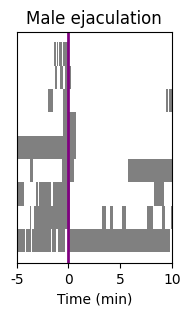

In [9]:
# Create a list of the IDs of the groups. Sort them based on the Time_in_Isolation_zone_per_10min column.
IDs = group_df[(group_df.State == 'Post_Ejaculation')].sort_values(by = 'Time_in_Isolation_zone_per_10min',ascending = True).ID

# plot figures
fig,ax = plt.subplots(1,1,figsize = (2,3))
for video_name in female_self_pacaed_sexual_behavior_meta[female_self_pacaed_sexual_behavior_meta.Experiment_type == 'SI'].video_name:
    temppath = [os.path.join(trackingdatapath,f) for f in os.listdir(trackingdatapath) if video_name in f][0]
    tempdf = pd.read_csv(temppath,index_col = False)
    filename,ID,Experiment_type,Ejaculation_frame,Framerate,Onset_frame,Offset_frame,First_Ejaculation_onset = \
    female_self_pacaed_sexual_behavior_meta.loc[female_self_pacaed_sexual_behavior_meta.video_name == video_name,['filename','ID','Experiment_type','Ejaculation_frame',\
                                                          'Framerate','Onset_frame','Offset_frame','Ejaculation_frame']].values[0]
    # align to the Ejaculation
    if Experiment_type == 'SI':
        Offset_frame = Ejaculation_frame + post_Ejaculation_window*Framerate
        alignment_frame = Ejaculation_frame
        # Adjust to what you want to align it to
        tempdf.loc[:,['Entry_frame','Exit_frame']] = tempdf.loc[:,['Entry_frame','Exit_frame']] 
    else:
        continue
    
    # Convert frames to seconds
    Entry_frame = tempdf[tempdf.Animal_name =='B6']['Entry_frame'].values/Framerate
    Exit_frame = tempdf[tempdf.Animal_name =='B6']['Exit_frame'].values/Framerate
    
    # Get which row 
    idx = np.where(IDs == ID)[0][0]

    # Plot start,stop and Ejaculation frames in the video
    if Experiment_type == 'SI':
        axs = ax
        axs.axvline(x = 0,color = 'purple',lw = 1)
    else:
        axs = ax
        axs.axvline(x = 1800,color = 'red',lw = 2)
        axs.axvline(x = 0,color = 'purple',lw = 2)

    [axs.fill_betweenx([idx,idx +1],\
                      x1 = Entry_frame[iidx],\
                      x2 = Exit_frame[iidx],alpha = 1,color = 'gray',lw = 0) \
     for iidx in range(len(Entry_frame))]
axs.set_xlabel('Time (min)')
axs.set_yticks([])
#axs.set_title(filename)
axs.set_title('Male ejaculation')
axs.set_xticks(np.linspace(-300,600,900//300 +1))
axs.set_xlim(-300,600)
axs.set_xticklabels(np.linspace(-5,10,15//5 +1).astype('int'))

fig.savefig(os.path.join(figurepath,'Figure1E.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure1E.pdf'),bbox_inches='tight')        

# Figure 1F

In [10]:
from scipy.ndimage import gaussian_filter
from moviepy.editor import *
import cv2

In [11]:
# variables used to generate heatmap
sigma = 6
extra_space = 15

In [12]:
# Function to create a heatmap overlayed with a video clip
def create_heatmap_overlayed_with_videoclip(tempmoviepath,x,y,cmap = cv2.COLORMAP_INFERNO,sigma = 5,extra_space = 1):
    if type(tempmoviepath) == tuple:
        # Create a heatmap with image size
        heatmap = np.zeros((tempmoviepath[1] + extra_space,tempmoviepath[0] + extra_space),dtype = int)
        img = heatmap
    else:
        # Load the video and chop it off at the same time.
        video_clip = VideoFileClip(tempmoviepath)  # Loads the video
        img = video_clip.get_frame(0)
    #plt.imshow(img)  # [OPTIONAL] Displays the first frame of the video

        # calculate heatmap
        heatmap = np.zeros((video_clip.size[1] + extra_space,video_clip.size[0] + extra_space),dtype = int)

    for xx,yy in zip(x,y):
        heatmap[yy,xx] = heatmap[yy,xx] + 1
    heatmap = gaussian_filter(heatmap,sigma = sigma)    

    uint_img = np.array((heatmap/np.max(heatmap))*255).astype('uint8')
    #grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
    heatmap_img = cv2.applyColorMap(uint_img,  cmap)

    super_imposed_img = cv2.addWeighted(heatmap_img[:-extra_space,:-extra_space,:], 1, img, 0.7, 0)
    return heatmap,img,heatmap_img,super_imposed_img

In [13]:
# Chose m514 as representative data
Representative_videos = {   'Control'   :{  'video_name':   '050922_m514-None',
                                            'video_size':   (290,406) ,
                                            'moviepath' :   os.path.join(moviepath,'050922_m514-None.mp4')},
                            'Pre-Comp.' :{  'video_name':   '0512_m514-m583',
                                            'video_size':   (284,394) ,
                                            'moviepath' :   os.path.join(moviepath,'0512_m514-m583.mp4')},
                            'Post-Comp.':{  'video_name':   '0512_m514-m583',
                                            'video_size':   (284,394) ,
                                            'moviepath' :   os.path.join(moviepath,'0512_m514-m583.mp4')},
                        }

## Control

Processing  050922_m514-None


True

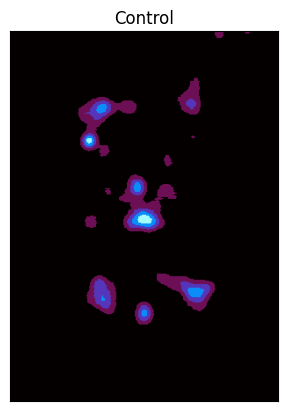

In [14]:
# Read the video file
video_name = Representative_videos['Control']['video_name']
tempmoviepath = Representative_videos['Control']['moviepath']

# read the tracking data file
positiontemppath = [os.path.join(positionpath,f) for f in os.listdir(positionpath) if video_name in f][0]
positiondf = pd.read_csv(positiontemppath,index_col = 0)

print("Processing ",video_name)

# Extract meta information
filename,ID,Experiment_type,Ejaculation_frame,fps = \
female_self_pacaed_sexual_behavior_meta.loc[female_self_pacaed_sexual_behavior_meta.video_name == video_name,['filename','ID','Experiment_type','Ejaculation_frame','Framerate']].values[0]

# Extract position information
# use the center as the position
x = positiondf['Center_2_x'].astype(int)
y = positiondf['Center_2_y'].astype(int)

__,__,control_heatmap,control_super_imposed_img = create_heatmap_overlayed_with_videoclip(tempmoviepath,x,y,
                                            cmap = cv2.COLORMAP_INFERNO,sigma = sigma,extra_space = extra_space)


fig,ax = plt.subplots(1,1)
ax.imshow(control_heatmap)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.set_title('Control')

fig.savefig(os.path.join(figurepath,'Figure1F-1.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure1F-1.pdf'),bbox_inches='tight')        

cv2.imwrite(os.path.join(figurepath,'Figure1F-1.tiff'),control_heatmap)

## Sexual interaction test

Processing  0512_m514-m583


True

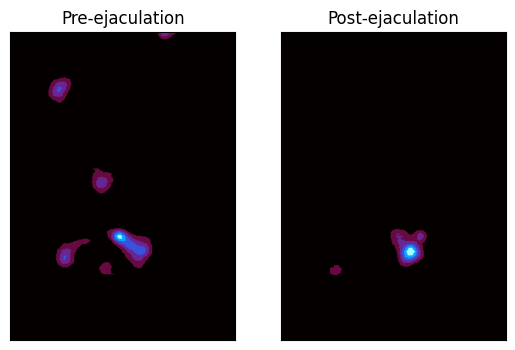

In [15]:
# Read the video file
video_name = Representative_videos['Pre-Comp.']['video_name']
tempmoviepath = Representative_videos['Pre-Comp.']['moviepath']

# read the tracking data file
positiontemppath = [os.path.join(positionpath,f) for f in os.listdir(positionpath) if video_name in f][0]
positiondf = pd.read_csv(positiontemppath,index_col = 0)

print("Processing ",video_name)

# Extract meta information
filename,ID,Experiment_type,Ejaculation_frame,fps = \
female_self_pacaed_sexual_behavior_meta.loc[female_self_pacaed_sexual_behavior_meta.video_name == video_name,['filename','ID','Experiment_type','Ejaculation_frame','Framerate']].values[0]

# Extract position information
# use the center as the position
x = positiondf['Center_2_x'].astype(int)
y = positiondf['Center_2_y'].astype(int)

__,__,pre_heatmap_img,pre_super_imposed_img = create_heatmap_overlayed_with_videoclip(tempmoviepath,
                                        x[:Ejaculation_frame],y[:Ejaculation_frame],
                                        cmap = cv2.COLORMAP_INFERNO,sigma = sigma,extra_space = extra_space)
__,__,post_heatmap_img,post_super_imposed_img = create_heatmap_overlayed_with_videoclip(tempmoviepath,
                                        x[Ejaculation_frame:Ejaculation_frame + int(post_Ejaculation_window * fps)],
                                        y[Ejaculation_frame:Ejaculation_frame + int(post_Ejaculation_window * fps)],
                                        cmap = cv2.COLORMAP_INFERNO,sigma = sigma,extra_space = extra_space)


fig,axs = plt.subplots(1,2)
axs[1].imshow(post_heatmap_img)
axs[0].imshow(pre_heatmap_img)
[ax.get_yaxis().set_visible(False) for ax in axs]
[ax.get_xaxis().set_visible(False) for ax in axs]
axs[0].set_title('Pre-ejaculation')
axs[1].set_title('Post-ejaculation')
fig.savefig(os.path.join(figurepath,'Figure1F-2.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure1F-2.pdf'),bbox_inches='tight')   

cv2.imwrite(os.path.join(figurepath,'Figure1F-2-pre.tiff'),pre_heatmap_img)
cv2.imwrite(os.path.join(figurepath,'Figure1F-2-post.tiff'),post_heatmap_img)



# Figure 1G

In [16]:
# Figure label
figlabel = 'Figure1G'
variable = 'Number_of_Isolation_zone_entry_per_10min'

In [17]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"),index_col = None)

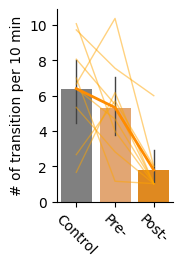

In [18]:
# Plot the number of zone transition per 10 min
fig,axs = plt.subplots(1,1,figsize = (1.5,2.5))
sns.barplot(data = group_df,
              x = 'sort_state_name',y ='Number_of_Isolation_zone_entry_per_10min',ax = axs,\
                palette = ['gray','sandybrown','darkorange'],errwidth = 1,)
sns.lineplot(data = group_df,
              x = 'sort_state_name',y ='Number_of_Isolation_zone_entry_per_10min',ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
              x = 'sort_state_name',y ='Number_of_Isolation_zone_entry_per_10min',err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticklabels(['Control','Pre-','Post-'],rotation = -45)
axs.set_xlim(-0.5,2.5)
axs.set_xlabel('')
axs.set_ylabel('# of transition per 10 min')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import pickle
import os

# Initialize the result DataFrame
columns = ['Figure', 'variable','Type of Test', 'Detail', 'statistic description', 'statistic', 'p Value']
manuscript_statistic_file = pd.DataFrame(columns=columns)

# Run repeated measures ANOVA
result = sm.stats.AnovaRM(data=group_df, depvar=variable, 
                          subject='ID', within=['State']).fit()
anova_summary = result.summary()
print(anova_summary)

# Extract ANOVA results
anova_df1 = result.anova_table['Num DF'][0]  # Between-subject df
anova_df2 = result.anova_table['Den DF'][0]  # Error df
anova_F = result.anova_table['F Value'][0]
anova_p = result.anova_table['Pr > F'][0]

# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Repeated Measures ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)

# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(group_df[variable],
                                  group_df['State'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'{figlabel}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)
# Show the resulting DataFrame
#print(manuscript_statistic_file)
#manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index= False)

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
State 10.8876 2.0000 16.0000 0.0010

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
         Control Post_Ejaculation  -4.6093 0.0015 -7.4918 -1.7267   True
         Control  Pre_Ejaculation  -1.0709 0.6284 -3.9534  1.8117  False
Post_Ejaculation  Pre_Ejaculation   3.5384 0.0142  0.6558   6.421   True
------------------------------------------------------------------------


# Figure 1H

In [22]:
# Figure label
figlabel = 'Figure1H'
variable = 'Duration_second'

In [23]:
# read data file
merge_df = pd.read_csv(os.path.join(datapath,"merge_df.csv"),index_col = None)

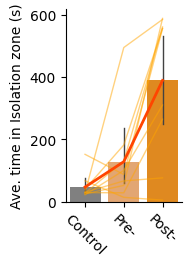

In [24]:
# Plot the duration in the Isolation zone per 10 min
fig,axs = plt.subplots(1,1,figsize = (1.5,2.5))
sns.barplot(data = merge_df.loc[merge_df.Type =='Isolation_zone',['ID','State','sort_state_name','Duration_second']].groupby(['ID','State']).mean().reset_index(),
              x = 'sort_state_name',y =variable,ax = axs,palette = ['gray','sandybrown','darkorange'],errwidth = 1)
sns.lineplot(data = merge_df.loc[merge_df.Type =='Isolation_zone',['ID','State','sort_state_name','Duration_second']].groupby(['ID','State']).mean().reset_index(),
              x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = merge_df.loc[merge_df.Type =='Isolation_zone',['ID','State','sort_state_name','Duration_second']].groupby(['ID','State']).mean().reset_index(),
              x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'orangered')
sns.despine()
axs.set_xticks(range(3))
axs.set_xticklabels(['Control','Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_xlim(-0.5,2.5)
axs.set_ylabel('Ave. time in Isolation zone (s)')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')        

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import pickle
import os

# convert dataframe
df = merge_df.loc[merge_df.Type =='Isolation_zone',['ID','State','sort_state_name',variable]].groupby(['ID','State']).mean().reset_index()

# Run repeated measures ANOVA
result = sm.stats.AnovaRM(data=df, depvar=variable, 
                          subject='ID', within=['State']).fit()
anova_summary = result.summary()
print(anova_summary)

# Extract ANOVA results
anova_df1 = result.anova_table['Num DF'][0]  # Between-subject df
anova_df2 = result.anova_table['Den DF'][0]  # Error df
anova_F = result.anova_table['F Value'][0]
anova_p = result.anova_table['Pr > F'][0]

# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Repeated Measures ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)

# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df[variable],
                                  df['State'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'{figlabel}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)
# Show the resulting DataFrame
#print(manuscript_statistic_file)
#manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index= False)

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
State 14.3444 2.0000 16.0000 0.0003

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1           group2       meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------
         Control Post_Ejaculation  342.0162 0.0004   153.483 530.5494   True
         Control  Pre_Ejaculation   81.4416 0.5361 -107.0916 269.9747  False
Post_Ejaculation  Pre_Ejaculation -260.5747 0.0057 -449.1079 -72.0415   True
----------------------------------------------------------------------------


# Figure 1I

In [26]:
# Figure label
figlabel = 'Figure1I'
variable = 'Latency (s)'

In [27]:
# read the latency dataframe
latencydf = pd.read_csv(os.path.join(datapath,'latency_df.csv'),index_col= False)

# stack the dataframe
stack_latencydf = latencydf.set_index(['filename']).stack().reset_index()
stack_latencydf.columns = ['filename','Behavior',variable]


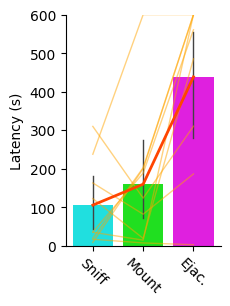

In [28]:
fig,axs = plt.subplots(1,1,figsize = (2,3))
sns.barplot(data = stack_latencydf,
               x = 'Behavior',y =variable,ax = axs,palette = ['cyan','lime','magenta'],errwidth = 1)
sns.lineplot(data = stack_latencydf,
              x = 'Behavior',y =variable,ax = axs,estimator = None,units = 'filename',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = stack_latencydf,
              x = 'Behavior',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'orangered')
sns.despine()
axs.set_xticklabels(['Sniff','Mount','Ejac.'],rotation = -45)
axs.set_ylabel(variable)
axs.set_xlabel('')
axs.set_ylim(0,600)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')       

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import pickle
import os

# Initialize the result DataFrame
columns = ['Figure', 'variable','Type of Test', 'Detail', 'statistic description', 'statistic', 'p Value']


# Run repeated measures ANOVA
result = sm.stats.AnovaRM(data=stack_latencydf, depvar=variable, 
                          subject='filename', within=['Behavior']).fit()
anova_summary = result.summary()
print(anova_summary)

# Extract ANOVA results
anova_df1 = result.anova_table['Num DF'][0]  # Between-subject df
anova_df2 = result.anova_table['Den DF'][0]  # Error df
anova_F = result.anova_table['F Value'][0]
anova_p = result.anova_table['Pr > F'][0]

# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Repeated Measures ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)

# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(stack_latencydf[variable],
                                  stack_latencydf['Behavior'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'{figlabel}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Tukey HSD',
        'Detail': f'Comparison {group1} vs {group2}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)
# Show the resulting DataFrame
#print(manuscript_statistic_file)
#manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index= False)

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
Behavior 11.8698 2.0000 16.0000 0.0007

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1              group2        meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------
Ejaculation_latency Interaction_latency -333.1104 0.0016 -542.4542 -123.7666   True
Ejaculation_latency       Mount_latency  -278.765 0.0077 -488.1088  -69.4212   True
Interaction_latency       Mount_latency   54.3454 0.7951 -154.9985  263.6892  False
-----------------------------------------------------------------------------------


# Figure 1K

In [30]:
# Figure label
figlabel = 'Figure1K'
variable = 'Number_of_Mounting_START_per_10min'


In [31]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"),index_col = None)

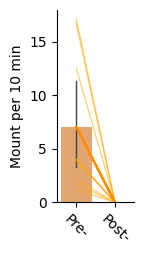

In [32]:
# Plot the number of mounts per 10 min
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,palette = ['gray','sandybrown','darkorange'],order = [0,1,2],errwidth = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([1,2])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Mount per 10 min')

axs.set_xlim(0.5,2.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')     


In [33]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.State == group1, variable].values,
    y=group_df.loc[group_df.State == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.State == group1, variable])
n_post = len(group_df.loc[group_df.State == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Number_of_Mounting_START_per_10min 0.00390625


# Figure 1J

In [34]:
# Figure label
figlabel = 'Figure1J'
variable = 'Number_of_Sniff_START_per_10min'


In [35]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"),index_col = None)

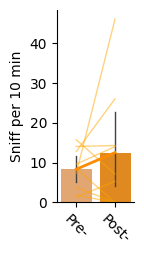

In [36]:
# Plot the number of mounts per 10 min
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,palette = ['gray','sandybrown','darkorange'],order = [0,1,2],errwidth = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([1,2])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Sniff per 10 min')

axs.set_xlim(0.5,2.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')     


In [37]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.State == group1, variable].values,
    y=group_df.loc[group_df.State == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.State == group1, variable])
n_post = len(group_df.loc[group_df.State == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Number_of_Sniff_START_per_10min 0.65234375


# Figure 1L

In [38]:
# Figure label
figlabel = 'Figure1L'
variable = 'Number_of_Intromission_START_per_10min'


In [39]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"),index_col = None)

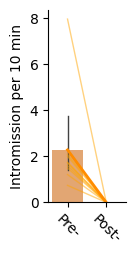

In [40]:
# Plot the number of mounts per 10 min
variable = 'Number_of_Intromission_START_per_10min'
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,palette = ['gray','sandybrown','darkorange'],order = [0,1,2],errwidth = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([1,2])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Intromission per 10 min')

axs.set_xlim(0.5,2.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')     


In [41]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.State == group1, variable].values,
    y=group_df.loc[group_df.State == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.State == group1, variable])
n_post = len(group_df.loc[group_df.State == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Number_of_Intromission_START_per_10min 0.00390625


# Figure 1M

In [42]:
# Figure label
figlabel = 'Figure1M'
variable = 'Number_of_Grooming_START_per_10min'


In [43]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"),index_col = None)

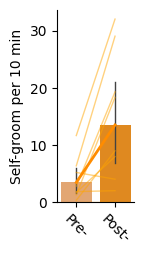

In [44]:
# Plot the number of mounts per 10 min
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,palette = ['gray','sandybrown','darkorange'],order = [0,1,2],errwidth = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
               x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([1,2])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Self-groom per 10 min')

axs.set_xlim(0.5,2.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')       


In [45]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.State == group1, variable].values,
    y=group_df.loc[group_df.State == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.State == group1, variable])
n_post = len(group_df.loc[group_df.State == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Number_of_Grooming_START_per_10min 0.02506184434388362


# Figure 1N

In [46]:
# read the group dataframe
group_df = pd.read_csv(os.path.join(datapath,'estrus_groupdf.csv'),index_col = False)
group_df

,ID,sort_state_name,sort_state_index,Mounting_nper10min,Sniffing_nper10min,Intromission_nper10min,Grooming_nper10min,Male_anogenital_sniffing_nper10min,Female_rearing_nper10min,ave_time_in_isolation_zone,transition_nper10min
0,m2031,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,231.081250,1.333333
1,m2033,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,20.598222,9.000000
2,m2035,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,33.428214,4.666667
3,m2038,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,26.174552,9.666667
4,m2032,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,28.210406,10.666667
5,m2036,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,25.940105,6.333333
6,m2036,Pre_Ejaculation,1,3.454524,2.961021,1.480510,6.909048,3.948028,0,65.086580,7.402552
7,m2032,Pre_Ejaculation,1,1.405103,1.405103,1.405103,0.000000,0.702551,0,62.910878,8.430617
8,m2033,Pre_Ejaculation,1,3.823655,3.235400,0.294127,1.764764,8.235565,0,35.104085,13.235729
9,m2035,Pre_Ejaculation,1,0.858692,1.621974,0.667872,3.434768,0.286231,0,224.350872,2.576076


In [47]:
# Figure label
figlabel = 'Figure1N'
variable = 'transition_nper10min'

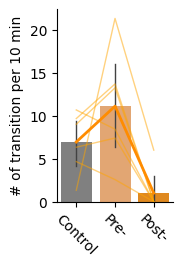

In [48]:
# plot transition per 10 min
# Plot the number of zone transition per 10 min
fig,axs = plt.subplots(1,1,figsize = (1.5,2.5))
sns.barplot(data = group_df,
              x = 'sort_state_index',y =variable,ax = axs,\
                palette = ['gray','sandybrown','darkorange'],errwidth = 1,)
sns.lineplot(data = group_df,
              x = 'sort_state_index',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
              x = 'sort_state_index',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticklabels(['Control','Pre-','Post-'],rotation = -45)
axs.set_xlim(-0.5,2.5)
axs.set_xlabel('')
axs.set_ylabel('# of transition per 10 min')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')        

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import pickle
import os

# Initialize the result DataFrame
columns = ['Figure', 'variable','Type of Test', 'Detail', 'statistic description', 'statistic', 'p Value']

# Run repeated measures ANOVA
result = sm.stats.AnovaRM(data=group_df, depvar=variable, 
                          subject='ID', within=['sort_state_name']).fit()
anova_summary = result.summary()
print(anova_summary)

# Extract ANOVA results
anova_df1 = result.anova_table['Num DF'][0]  # Between-subject df
anova_df2 = result.anova_table['Den DF'][0]  # Error df
anova_F = result.anova_table['F Value'][0]
anova_p = result.anova_table['Pr > F'][0]

# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Repeated Measures ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)

# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(group_df[variable],
                                  group_df['sort_state_name'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'{figlabel}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)
# Show the resulting DataFrame
#print(manuscript_statistic_file)
#manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index= False)

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
sort_state_name  7.5415 2.0000 10.0000 0.0101

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
         Control Post_Ejaculation  -5.9444 0.0871 -12.6658   0.777  False
         Control  Pre_Ejaculation   4.1617 0.2727  -2.5597 10.8831  False
Post_Ejaculation  Pre_Ejaculation  10.1062 0.0038   3.3848 16.8276   True
-------------------------------------------------------------------------


# Figure 1O

In [50]:
# read the group dataframe
group_df = pd.read_csv(os.path.join(datapath,'estrus_groupdf.csv'),index_col = False)
group_df

,ID,sort_state_name,sort_state_index,Mounting_nper10min,Sniffing_nper10min,Intromission_nper10min,Grooming_nper10min,Male_anogenital_sniffing_nper10min,Female_rearing_nper10min,ave_time_in_isolation_zone,transition_nper10min
0,m2031,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,231.081250,1.333333
1,m2033,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,20.598222,9.000000
2,m2035,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,33.428214,4.666667
3,m2038,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,26.174552,9.666667
4,m2032,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,28.210406,10.666667
5,m2036,Control,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,25.940105,6.333333
6,m2036,Pre_Ejaculation,1,3.454524,2.961021,1.480510,6.909048,3.948028,0,65.086580,7.402552
7,m2032,Pre_Ejaculation,1,1.405103,1.405103,1.405103,0.000000,0.702551,0,62.910878,8.430617
8,m2033,Pre_Ejaculation,1,3.823655,3.235400,0.294127,1.764764,8.235565,0,35.104085,13.235729
9,m2035,Pre_Ejaculation,1,0.858692,1.621974,0.667872,3.434768,0.286231,0,224.350872,2.576076


In [51]:
# Figure label
figlabel = 'Figure1O'
variable = 'ave_time_in_isolation_zone'

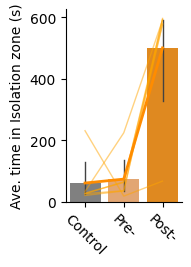

In [52]:
# plot transition per 10 min
# Plot the number of zone transition per 10 min
fig,axs = plt.subplots(1,1,figsize = (1.5,2.5))
sns.barplot(data = group_df,
              x = 'sort_state_index',y =variable,ax = axs,\
                palette = ['gray','sandybrown','darkorange'],errwidth = 1,)
sns.lineplot(data = group_df,
              x = 'sort_state_index',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
              x = 'sort_state_index',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticklabels(['Control','Pre-','Post-'],rotation = -45)
axs.set_xlim(-0.5,2.5)
axs.set_xlabel('')
axs.set_ylabel('Ave. time in Isolation zone (s)')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')        

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import pickle
import os

# Initialize the result DataFrame
columns = ['Figure', 'variable','Type of Test', 'Detail', 'statistic description', 'statistic', 'p Value']

# Run repeated measures ANOVA
result = sm.stats.AnovaRM(data=group_df, depvar=variable, 
                          subject='ID', within=['sort_state_name']).fit()
anova_summary = result.summary()
print(anova_summary)

# Extract ANOVA results
anova_df1 = result.anova_table['Num DF'][0]  # Between-subject df
anova_df2 = result.anova_table['Den DF'][0]  # Error df
anova_F = result.anova_table['F Value'][0]
anova_p = result.anova_table['Pr > F'][0]

# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Repeated Measures ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)

# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(group_df[variable],
                                  group_df['sort_state_name'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'{figlabel}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)
# Show the resulting DataFrame
#print(manuscript_statistic_file)
#manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index= False)

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
sort_state_name 15.7136 2.0000 10.0000 0.0008

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1           group2      meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------
         Control Post_Ejaculation 439.6221 0.0002  231.3421  647.902   True
         Control  Pre_Ejaculation  12.7411 0.9862 -195.5388  221.021  False
Post_Ejaculation  Pre_Ejaculation -426.881 0.0002 -635.1609 -218.601   True
---------------------------------------------------------------------------


# Figure 1P

In [54]:
# Figure label
figlabel = 'Figure1P'
variable = 'Latency (s)'

In [55]:
# Convert latency data
stack_latencydf = Estrus_behavior_meta[['ID','interaction_ave_latency','mount_ave_latency','ejac_ave_latency']].set_index(['ID']).stack().reset_index()
stack_latencydf.columns = ['filename','Behavior',variable]


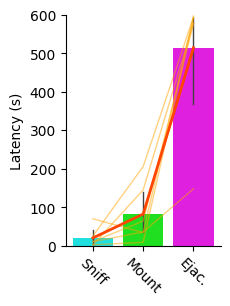

In [56]:
fig,axs = plt.subplots(1,1,figsize = (2,3))
sns.barplot(data = stack_latencydf,
               x = 'Behavior',y =variable,ax = axs,palette = ['cyan','lime','magenta'],errwidth = 1)
sns.lineplot(data = stack_latencydf,
              x = 'Behavior',y =variable,ax = axs,estimator = None,units = 'filename',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = stack_latencydf,
              x = 'Behavior',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'orangered')
sns.despine()
axs.set_xticklabels(['Sniff','Mount','Ejac.'],rotation = -45)
axs.set_ylabel(variable)
axs.set_xlabel('')
axs.set_ylim(0,600)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')       

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import pickle
import os

# Initialize the result DataFrame
columns = ['Figure', 'variable','Type of Test', 'Detail', 'statistic description', 'statistic', 'p Value']


# Run repeated measures ANOVA
result = sm.stats.AnovaRM(data=stack_latencydf, depvar=variable, 
                          subject='filename', within=['Behavior']).fit()
anova_summary = result.summary()
print(anova_summary)

# Extract ANOVA results
anova_df1 = result.anova_table['Num DF'][0]  # Between-subject df
anova_df2 = result.anova_table['Den DF'][0]  # Error df
anova_F = result.anova_table['F Value'][0]
anova_p = result.anova_table['Pr > F'][0]

# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Repeated Measures ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)

# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(stack_latencydf[variable],
                                  stack_latencydf['Behavior'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'{figlabel}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'N/A',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)
# Show the resulting DataFrame
#print(manuscript_statistic_file)
#manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index= False)

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
Behavior 38.3637 2.0000 10.0000 0.0000

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                  group2          meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------------------------
       ejac_ave_latency interaction_ave_latency -494.1627    0.0 -664.7399 -323.5854   True
       ejac_ave_latency       mount_ave_latency -431.9758    0.0 -602.5531 -261.3986   True
interaction_ave_latency       mount_ave_latency   62.1868 0.6201 -108.3904  232.7641  False
-------------------------------------------------------------------------------------------


# Figure 1Q

In [58]:
# Figure label
figlabel = 'Figure1Q'
variable = 'Sniffing_nper10min'


In [59]:
# read the group dataframe
group_df = pd.read_csv(os.path.join(datapath,'estrus_groupdf.csv'),index_col = False)
group_df = group_df[group_df.sort_state_index > 0]

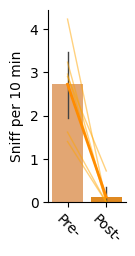

In [60]:
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,palette = ['sandybrown','darkorange'],errwidth = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([0,1])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Sniff per 10 min')

axs.set_xlim(-0.5,1.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')         


In [61]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.sort_state_name == group1, variable].values,
    y=group_df.loc[group_df.sort_state_name == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.sort_state_name == group1, variable])
n_post = len(group_df.loc[group_df.sort_state_name == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Sniffing_nper10min 0.03125


# Figure 1R

In [62]:
# Figure label
figlabel = 'Figure1R'
variable = 'Mounting_nper10min'


In [63]:
# read the group dataframe
group_df = pd.read_csv(os.path.join(datapath,'estrus_groupdf.csv'),index_col = False)
group_df = group_df[group_df.sort_state_index > 0]

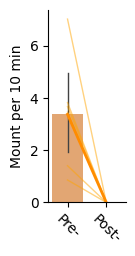

In [64]:
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,palette = ['sandybrown','darkorange'],errwidth = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([0,1])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Mount per 10 min')

axs.set_xlim(-0.5,1.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')         


In [65]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.sort_state_name == group1, variable].values,
    y=group_df.loc[group_df.sort_state_name == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.sort_state_name == group1, variable])
n_post = len(group_df.loc[group_df.sort_state_name == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Mounting_nper10min 0.03125


# Figure 1S

In [66]:
# Figure label
figlabel = 'Figure1S'
variable = 'Intromission_nper10min'


In [67]:
# read the group dataframe
group_df = pd.read_csv(os.path.join(datapath,'estrus_groupdf.csv'),index_col = False)
group_df = group_df[group_df.sort_state_index > 0]

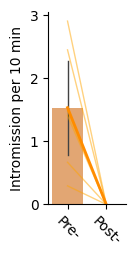

In [68]:
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,palette = ['sandybrown','darkorange'],errwidth = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([0,1])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Intromission per 10 min')

axs.set_xlim(-0.5,1.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')         


In [69]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.sort_state_name == group1, variable].values,
    y=group_df.loc[group_df.sort_state_name == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.sort_state_name == group1, variable])
n_post = len(group_df.loc[group_df.sort_state_name == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Intromission_nper10min 0.03125


# Figure 1T

In [70]:
# Figure label
figlabel = 'Figure1T'
variable = 'Grooming_nper10min'


In [71]:
# read the group dataframe
group_df = pd.read_csv(os.path.join(datapath,'estrus_groupdf.csv'),index_col = False)
group_df = group_df[group_df.sort_state_index > 0]

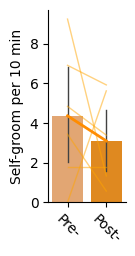

In [72]:
fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.barplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,palette = ['sandybrown','darkorange'],errwidth = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,ax = axs,estimator = None,units = 'ID',sort = True,color = 'orange',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,
            x = 'sort_state_name',y =variable,err_style= None,ax = axs,alpha =1,lw = 2,color = 'darkorange')
sns.despine()
axs.set_xticks([0,1])
axs.set_xticklabels(['Pre-','Post-'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Self-groom per 10 min')

axs.set_xlim(-0.5,1.5)
#axs.set_ylim(-0.1,)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')         


In [73]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.sort_state_name == group1, variable].values,
    y=group_df.loc[group_df.sort_state_name == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.sort_state_name == group1, variable])
n_post = len(group_df.loc[group_df.sort_state_name == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Grooming_nper10min 0.34523107177184


In [78]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)